<a href="https://colab.research.google.com/github/2015samtaylor/Data_Sci/blob/main/Stock_EPS_Analysis_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EPS Analysis

In [2]:
#@title Install Packages
%%capture
!pip install alpha_vantage
from google.colab import data_table
data_table.disable_dataframe_formatter()

Input your stock ticker: cost



Last reported EPS: 2.93 on 2023-05-25


,Revenue,EPS
Current Qtr (8/2023),78.81B,4.63
Next Qtr (11/2023),57.75B,3.33
Current Year (8/2023),242.16B,14.40
Next Year (8/2024),253.19B,15.39


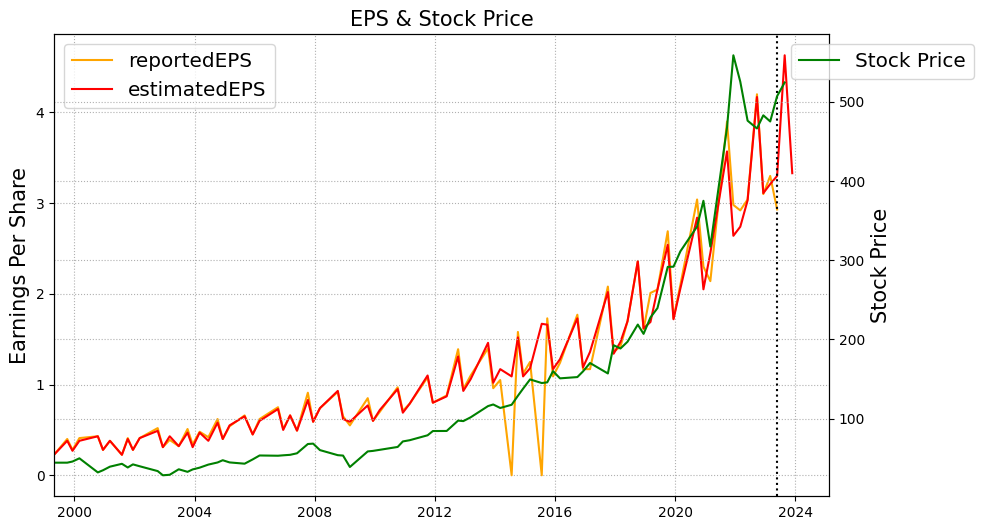

reportedDate,2023-11-25,2023-08-25,2023-05-25,2023-03-02,2022-12-08,2022-09-22,2022-05-31,2022-03-03,2021-12-09,2021-09-23,2021-03-04,2020-12-10,2020-09-24,2020-03-05,2019-12-12,2019-10-03,2019-05-31,2019-03-07,2018-12-13,2018-10-04,2018-06-01,2018-03-07,2017-12-14,2017-10-05,2017-03-02,2016-12-07,2016-09-29,2016-03-02,2015-12-08,2015-09-29,2015-07-24,2015-03-04,2014-12-09,2014-10-07,2014-07-23,2014-03-06,2013-12-11,2013-10-09,2013-03-12,2012-12-12,2012-10-10,2012-05-24,2011-12-08,2011-10-05,2011-03-02,2010-12-08,2010-10-06,2010-03-03,2009-12-10,2009-10-07,2009-03-04,2008-12-11,2008-10-08,2008-03-05,2007-12-13,2007-10-10,2007-05-31,2007-03-08,2006-12-14,2006-10-12,2006-03-02,2005-12-08,2005-09-01,2005-03-02,2004-12-09,2004-10-07,2004-06-17,2004-03-03,2003-12-09,2003-10-08,2003-06-23,2003-03-05,2002-12-12,2002-10-10,2002-03-05,2001-12-13,2001-10-11,2001-08-01,2001-03-08,2000-12-14,2000-10-12,2000-03-02,1999-12-09,1999-10-06,1999-04-30,1998-11-30,1998-08-31,1998-05-31,1998-02-28,1997-11-30
reportedEPS,3.33,4.63,2.93,3.30,3.10,4.20,3.04,2.92,2.98,3.90,2.14,2.3,3.04,2.10,1.73,2.69,2.0468,2.01,1.61,2.36,1.6979,1.42,1.36,2.08,1.17,1.17,1.77,1.24,1.09,1.73,0.0,1.25,1.12,1.58,0.0,1.05,0.96,1.40,1.1,0.95,1.39,0.88,0.80,1.08,0.79,0.71,0.97,0.70,0.60,0.85,0.55,0.65,0.92,0.74,0.59,0.91,0.4922,0.66,0.51,0.75,0.62,0.45,0.66,0.54,0.40,0.62,0.42,0.48,0.34,0.51,0.3209,0.39,0.31,0.52,0.41,0.28,0.41,0.226,0.38,0.28,0.43,0.41,0.28,0.4,0.2282,-0.0295,0.3227,0.1834,0.2733,0.2156
percentage_change,7.42,10.24,-3.62,13.01,4.03,7.69,42.06,26.96,-1.97,85.71,23.70,-14.5,48.52,4.48,7.45,13.98,20.5500,41.55,18.38,13.46,45.1200,21.37,-23.16,67.74,7.34,-32.37,inf,-0.80,-2.68,9.49,NaN,19.05,16.67,12.86,-100.0,10.53,-30.94,59.09,37.5,-12.04,75.95,23.94,-17.53,54.29,31.67,-16.47,76.36,7.69,-34.78,14.86,-6.78,-28.57,86.92,12.12,15.69,21.33,-20.6100,46.67,-22.73,38.89,55.00,-27.42,57.14,12.50,17.65,21.57,30.88,23.08,9.68,-1.92,-21.7300,39.29,-24.39,130.09,7.89,0.00,-4.65,-44.880,35.71,-30.00,88.43,1489.83,-13.23,118.1,-16.5000,-113.6800,NaN,NaN,NaN,NaN


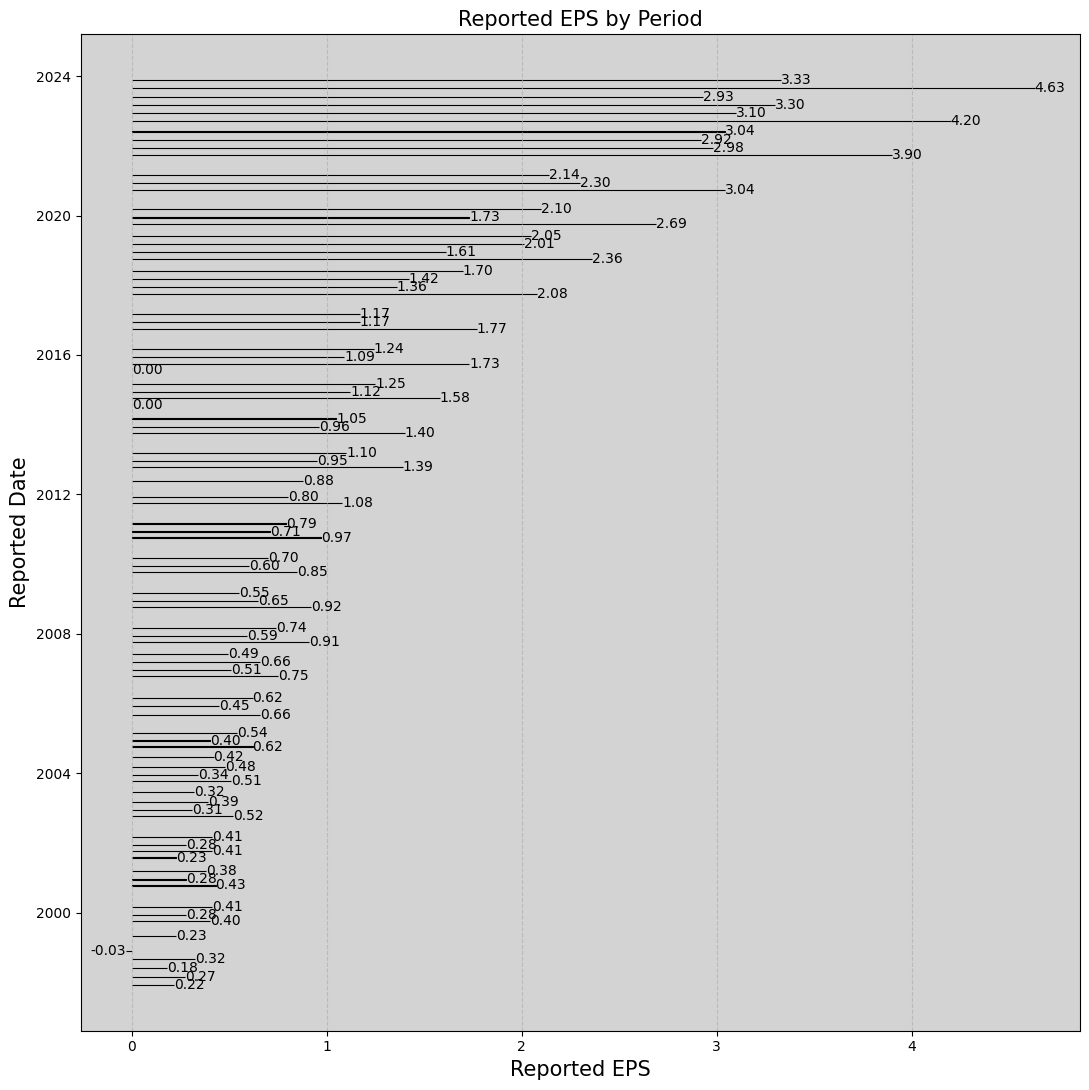

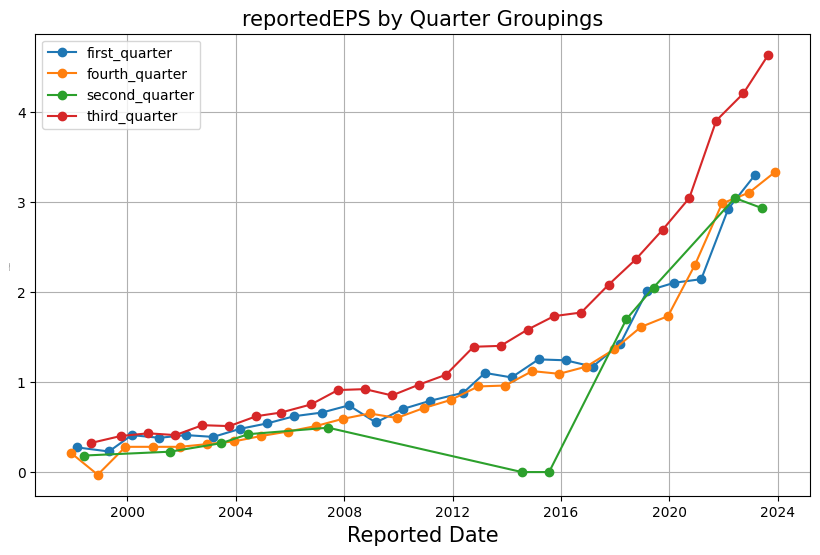





 
Earnings Cycle Correlation, takes the difference in EPS from Quarter to Quarter and compares YoY correlation

Average correlation value for all years 0.92
Average correlation value of last 16 years: 0.92


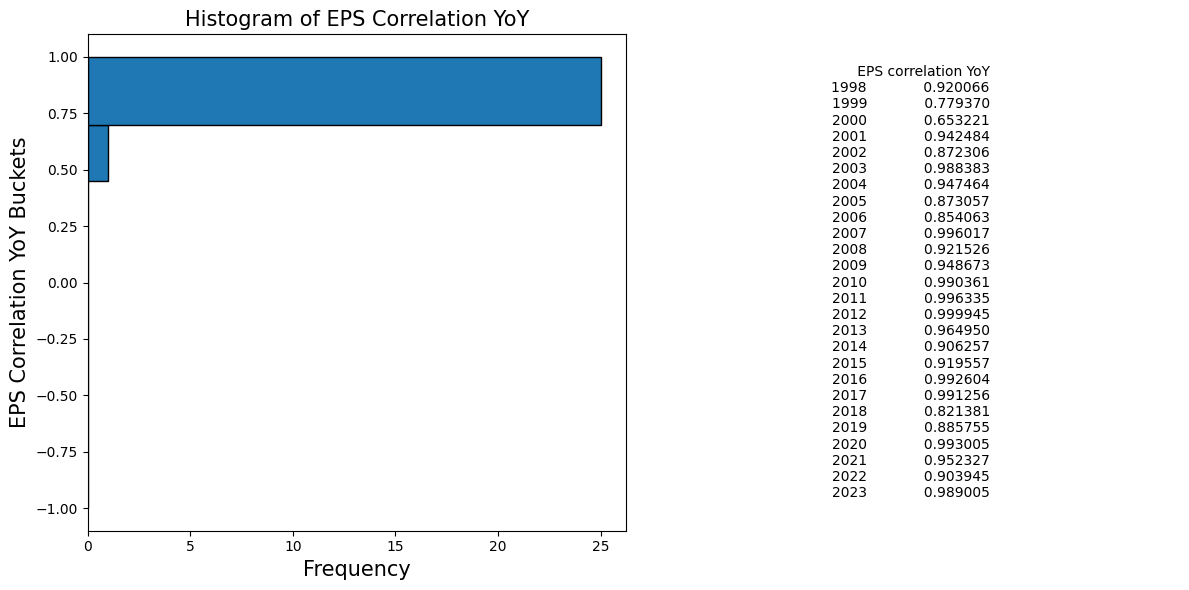

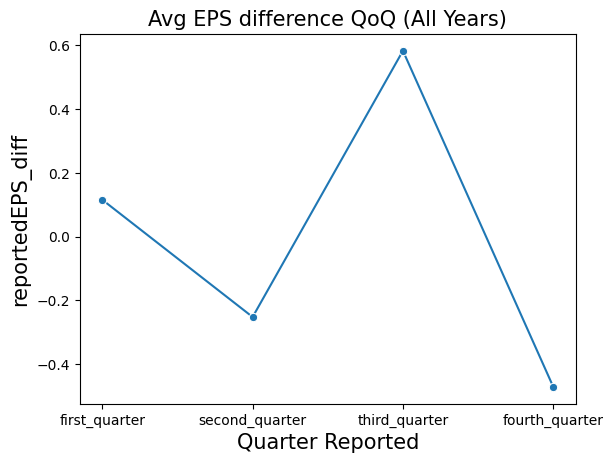





Percent of Positive Returns YoY Aggregated by Month


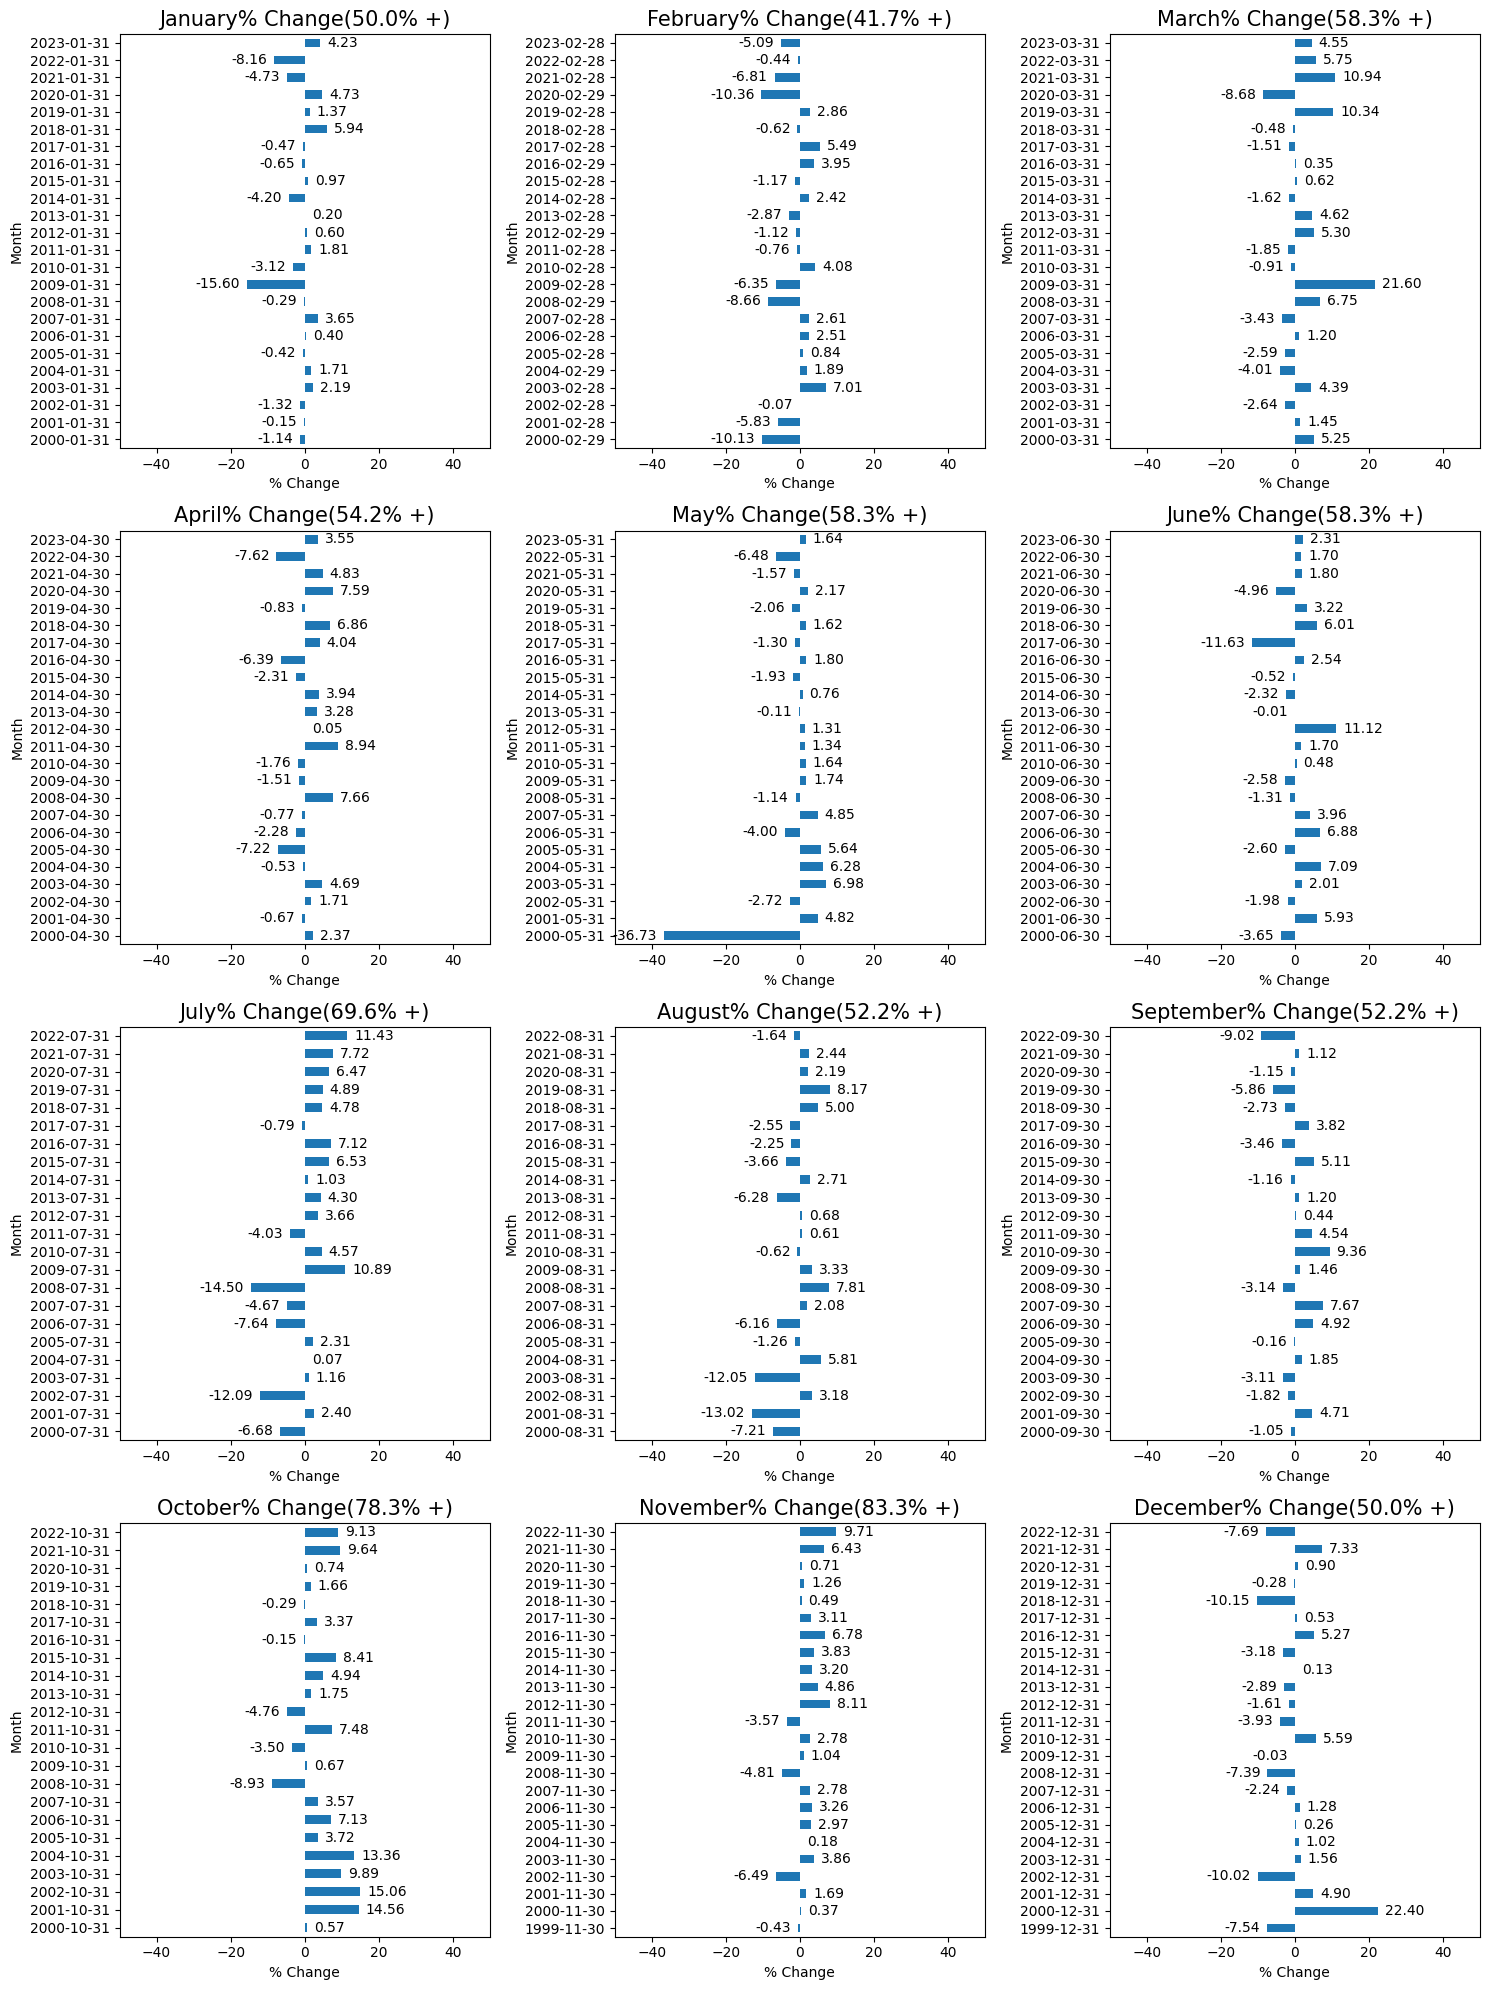

In [3]:
#@title Run Code
import pandas as pd
import alpha_vantage
import csv
import requests
import warnings
import math
from itertools import cycle, islice
import re
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from alpha_vantage.timeseries import TimeSeries
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
import requests
from bs4 import BeautifulSoup
warnings.simplefilter('ignore')
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

api_key = ('LV026BV34OE5U10I')
sym = input("Input your stock ticker: ")

class calls:

    def get_weekly_data():

        ts = TimeSeries(key= api_key, output_format = 'pandas')
        df, meta_data = ts.get_weekly(symbol = sym.upper())

        df.reset_index(inplace = True)
        df['date'] = pd.to_datetime(df['date'])
        df.rename(columns = {'date': 'reportedDate'}, inplace = True)
        df = df.sort_values(by = 'reportedDate')

        return(df)

    def merge_weekly_stock(frame, df, kicker): # merge stock earnings, with weekly data. Insert columns

        frame.sort_values(by = 'fiscalDateEnding', inplace = True)

        if kicker == 'TRUE':
            frame.rename(columns = {'fiscalDateEnding': 'reportedDate'}, inplace = True)
             #create Free Cash Flow
            frame = frame.replace('None', 0)
            frame['FreeCashFlow'] = frame['operatingCashflow'] - frame['capitalExpenditures']
        else:
            pass

        new_df = pd.merge_asof(frame, df, on='reportedDate', direction='nearest')

        # add in the most up to date stock price as the final column
        end_stock_date = df['reportedDate'][0]
        end_stock_val = df['4. close'][0]

        # create the dict with to be the final row with proper date, & stock close.
        keys = list(new_df.columns)
        d = {key: None if key != '4. close' else end_stock_val for key in keys}
        d['reportedDate']= end_stock_date

        new_df = new_df.append(d, ignore_index = True)

        return(new_df)

    def statement(statement):

        url = f'https://www.alphavantage.co/query?function={statement}&symbol={sym.upper()}&apikey={api_key}'

        if statement == 'CASH_FLOW':

            r = requests.get(url)

            if r.status_code == 200:
                try:
                    cf_annual = pd.DataFrame(r.json()['annualReports'])
                except:
                    print('Annual Reports do not exist in cash flow call')
                try:
                    cf_quarterly = pd.DataFrame(r.json()['quarterlyReports'])
                except:
                    print('Quarterly Reports do not exist in cash flow call')


                cf_quarterly[['paymentsForRepurchaseOfCommonStock', 'capitalExpenditures', 'operatingCashflow']] = cf_quarterly[['paymentsForRepurchaseOfCommonStock', 'capitalExpenditures', 'operatingCashflow']].replace('None', 0)
                cf_annual[['paymentsForRepurchaseOfCommonStock', 'capitalExpenditures', 'operatingCashflow']] = cf_annual[['paymentsForRepurchaseOfCommonStock', 'capitalExpenditures', 'operatingCashflow']].replace('None', 0)

                return(cf_annual, cf_quarterly)

        elif statement == 'EARNINGS':

                r = requests.get(url)
                data = r.json()

                if statement == 'EARNINGS':
                    try:
                        annual = pd.DataFrame(data['annualEarnings'])
                        quarterly = pd.DataFrame(data['quarterlyEarnings'])
                        annual['weekly'] = annual['fiscalDateEnding'].str[:7]
                        quarterly['weekly'] = quarterly['reportedDate'].str[:7]
                    except KeyError:
                        print('Too many calls to the API within the time limit. (5 API Request per minute)')
                else:
                    annual = pd.DataFrame(data['annualReports'])
                    quarterly = pd.DataFrame(data['quarterlyReports'])


                # For rows with none replace with np.nan. Then replace 'reportedEPS' with 'estimatedEPS' if NaN.
                quarterly = quarterly.replace('None', np.nan)
                quarterly['estimatedEPS'].fillna(quarterly['reportedEPS'], inplace=True)
                annual = annual.replace('None', np.nan)

                quarterly['reportedEPS'] = quarterly['reportedEPS'].astype(float)

                quarterly['reportedEPS_diff'] = quarterly['reportedEPS'].diff()
#                 annual['reportedEPS_diff'] = annual['reportedEPS'].diff()

                return(annual, quarterly)  #get data via alpha vantage API

    def fix_dtypes(frame):

        #change date_cols to datetime using regex
        date_cols = list(frame.filter(regex=re.compile('date', re.IGNORECASE)).columns)


        for i in date_cols:
            frame[i] = pd.to_datetime(frame[i])

        #get remaining columns try to change to float, if error occurs then assume a string
        other_cols = list(set(frame.columns) - set(date_cols))

        for i in other_cols:
            try:
                frame[i] = frame[i].astype(float)
            except ValueError:
                frame[i] = frame[i].astype(str) # fix data types from the API call

    def scrape_splits():  # webscrape historical stock splits from said stock.
        session = requests.Session()
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',}
        url = 'https://www.stocksplithistory.com/?symbol={}'.format(sym.upper())
        response = session.get(url, headers= headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table', {'class': 'split-history-table'})
        td_tags = soup.find_all('td', {'align': 'center', 'style': 'padding: 4px; border-bottom: 1px solid #CCCCCC'})


        date_list = []
        split_list = []

        for i in range(0, len(td_tags), 2):
            date = td_tags[i].text.strip()
            split = td_tags[i+1].text.strip()
            date_list.append(date)
            split_list.append(split)

        splits = pd.DataFrame({'Date': date_list, 'Split': split_list})
        splits['Date'] = pd.to_datetime(splits['Date'])
        splits_filt = splits.loc[splits['Date'] > '01/01/2000']
        return(splits_filt)

    def normalize_stock_splits(df, scrape): #normalize the dataframe.

        i = 0
        while i < len(scrape):

            split_string = list(scrape['Split'].values)[i]
            split_list = split_string.split("for")
            split_ratio = int(split_list[0].strip())

            split_date = scrape['Date'].values[i]
            split_date = pd.to_datetime(split_date)

            #filter for current week up to split & everything prior.
            mask = ((df['reportedDate'].dt.year < split_date.year) |
                ((df['reportedDate'].dt.year == split_date.year) & (df['reportedDate'].dt.week < split_date.week)))
            split_df = df.loc[mask]


            split_df['1. open'] = split_df['1. open'] / split_ratio
            split_df['2. high'] = split_df['2. high'] / split_ratio
            split_df['3. low'] = split_df['3. low'] / split_ratio
            split_df['4. close'] = split_df['4. close'] / split_ratio


            df.update(split_df)
            i += 1

        return(df)

    def plot_EPS_stock(df_merged):
        df_merged = df_merged.loc[df_merged['reportedDate'].dt.year >= 1999]

        fig, ax1 = plt.subplots(figsize=(10, 6))
        ax2 = ax1.twinx()

        # plot the first line with the left y-axis
        sns.lineplot(x='reportedDate', y='reportedEPS', data=df_merged, ax=ax1, color='orange', label='reportedEPS')

        # plot the second line with the left y-axis
        sns.lineplot(x='reportedDate', y='estimatedEPS', data=df_merged, ax=ax1, color='red', label='estimatedEPS')

        # plot the third with the right y-axis
        sns.lineplot(x='reportedDate', y='4. close', data=df_merged, color='green', label='Stock Price')

        ax1.set_xlabel('')
        ax1.set_ylabel('Earnings Per Share', fontsize=15)
        ax1.tick_params(axis='both', which='major', labelsize=10)
        ax2.set_ylabel('Stock Price', fontsize=15)
        ax2.tick_params(axis='y', which='major', labelsize=10)
        ax1.set_title('EPS & Stock Price', fontsize=15)

        # adjust the position of the legends
        legend1 = ax1.legend(loc='upper left', fontsize='x-large')
        legend2 = ax2.legend(loc='upper right', fontsize='x-large', bbox_to_anchor=(1.2, 1))

        # set zorder to bring the legends to the front
        legend1.set_zorder(100)
        legend2.set_zorder(100)

        last_date = df_merged['reportedDate'].iloc[-3]
        ax1.axvline(x=last_date, linestyle='dotted', color='black')

        ax1.invert_yaxis()

        # show the grid lines behind the legends
        ax1.grid(True, linestyle='dotted', zorder=0)
        ax2.grid(True, linestyle='dotted', zorder=0)
        ax1.set_xlim(df_merged['reportedDate'].iloc[0])

        plt.show()  # EPS vs Stock Plot #plot EPS, vs stock price weekly

    def get_next_numbers():  #scraping future earnings

        session = requests.Session()
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',}

        url = 'https://www.zacks.com/stock/quote/{}/detailed-earning-estimates'.format(sym.upper())
        response = session.get(url, headers = headers)

        soup = BeautifulSoup(response.content, 'html.parser')

        tags = soup.find_all('a', href='/stock/chart/{}/price-consensus-eps-surprise-chart'.format(sym.upper()))

        number_values = []
        for tag in tags:
            text = tag.text
            number_values.append(text)

        t = soup.find_all('th', {'class': ''})

        tag_list = []
        for tags in t:
            tag_list.append(tags.text)

        t = pd.DataFrame(tag_list, columns = ['Tags'])
        t = pd.DataFrame(t['Tags'].drop_duplicates())
        t = t[t['Tags'].str.contains('Qtr|Year')]

        frame = {'Revenue': number_values[1:5],
                'EPS': number_values[6:10]}

        index = list(t['Tags'][0:4].values)
        scrape = pd.DataFrame(frame, index=index)
        #---------------------------------------

        tds = soup.find_all('td', {'class': 'alpha'})

        data = []
        for td in tds:
            row = {}
            if td.text == 'Current' or td.text == '7 Days Ago' or td.text == '30 Days Ago' or td.text == '60 Days Ago' or td.text == '90 Days Ago':
                row['Period'] = td.text
                row['Value1'] = td.find_next_siblings('td')[0].text
                row['Value2'] = td.find_next_siblings('td')[1].text
                row['Value3'] = td.find_next_siblings('td')[2].text
                row['Value4'] = td.find_next_siblings('td')[3].text
                data.append(row)

        consensus = pd.DataFrame(data)
        consensus.set_index('Period', inplace = True)
        col_dict = dict(zip(list(consensus.columns), index))
        consensus = consensus.rename(columns = col_dict)

        return(scrape, consensus)

    def insert_proj_EPS(current_or_next, frame, proj): #insert projected EPS

        #get the last record of earnings quarterly and offset by 3 months
        fiscal_val = frame.iloc[len(frame) -1]['fiscalDateEnding']
        reported_val = frame.iloc[len(frame) -1]['reportedDate']
        offset = pd.DateOffset(months = 3)

        fiscal_date_end = fiscal_val+offset
        reported_date_end = reported_val + offset

        if current_or_next == 'current':
            qtr = proj['EPS'][0]
        elif current_or_next == 'next':
            qtr = proj['EPS'][1]
        else:
            print('Error with naming convention')


        first_row = pd.DataFrame({
            'fiscalDateEnding': [fiscal_date_end],
            'reportedDate': [reported_date_end],
            'reportedEPS': [None],
            'estimatedEPS': [qtr],
            'surprise': [0],
            'surprisePercentage': [0],
            'weekly': ['2023']
        })

        if current_or_next == 'current':
            frame.loc[-1] = first_row.iloc[0]
        elif current_or_next == 'next':
            frame.loc[-2] = first_row.iloc[0]
        else:
            print('Error with row update')

    def EPS_frame():

        df_merged.set_index('reportedDate', inplace=True)
        EPS_frame = df_merged.loc[:, ['reportedEPS', 'estimatedEPS']]

        # get the projections for next quarter to assume the empty spaces.
        EPS_frame['reportedEPS'] = EPS_frame['reportedEPS'].fillna(EPS_frame['estimatedEPS'])
        EPS_frame = EPS_frame[['reportedEPS']]
        EPS_frame['reportedEPS'] = EPS_frame['reportedEPS'].astype(float)

        EPS_frame['percentage_change'] = EPS_frame.pct_change(periods=4)

        # Identify the indices where the reportedEPS changed from negative to positive
        positive_indices = EPS_frame.loc[(EPS_frame['reportedEPS'] > 0) & (EPS_frame['reportedEPS'].shift(4) < 0)].index
        # Update the percentage_change column to be positive for the identified indices
        EPS_frame.loc[positive_indices, 'percentage_change'] = EPS_frame.loc[positive_indices, 'percentage_change'].abs()

        EPS_frame['percentage_change'] = EPS_frame['percentage_change'] * 100
        EPS_frame['percentage_change'] = EPS_frame['percentage_change'].round(2)
        EPS_frame_ = EPS_frame
        EPS_frame = EPS_frame[::-1]
        EPS_frame = EPS_frame.transpose()
        display(EPS_frame.head(50))
        return(EPS_frame_)

    def create_months_frame(EPS_frame):

        #create quarter groupings based on the amount of instances in year one. Then replicate the pattern.
        months = pd.DataFrame(EPS_frame.index.month.value_counts()).sort_index()

        months = months.reset_index()
        months.rename(columns = {'index': 'month'}, inplace = True)

        while len(months) >= 6:
            min_reported_date = months['reportedDate'].min()
            months = months[months['reportedDate'] != min_reported_date]


        if (months['reportedDate'].value_counts() > 1).any() & (len(months) > 4):

            dup_count = months['reportedDate'].value_counts().idxmax()
            month_choice = []
            for value1, value2 in zip(months['month'], months['reportedDate']):
                if value2 == dup_count:
                    month_choice.append(value1)

            options = list(months['month'].values)
            options_refined = [x for x in options if x not in month_choice]

            # Calculate the differences between each number and the subsequent numbers
            differences = [abs(number - options_refined[i+1]) for i, number in enumerate(options_refined[:-1])]

            # Find the index of the number with the smallest difference
            best_fit_index = differences.index(min(differences))

            # Get the number from month_choice that fits better in a linear manner
            best_fit_number = month_choice[best_fit_index]
            months = months[months['month'] != best_fit_number]
        else:
            pass

        months['month'] = months.month.apply(lambda x: calendar.month_name[x])
        months = months.reset_index(drop = True)
        return(months)

    def average_best_EPS(EPS_frame):

        EPS_frame['month'] = EPS_frame.index.month
        EPS_frame['reportedEPS_diff'] = EPS_frame['reportedEPS'].diff()

        year_counts = EPS_frame.index.year.value_counts()
        year_counts = pd.DataFrame(year_counts).reset_index().sort_values(by = 'index')

        quarter_mapping = {
        1: 'first_quarter',
        2: 'first_quarter',
        3: 'first_quarter',
        4: 'second_quarter',
        5: 'second_quarter',
        6: 'second_quarter',
        7: 'third_quarter',
        8: 'third_quarter',
        9: 'third_quarter',
        10: 'fourth_quarter',
        11: 'fourth_quarter',
        12: 'fourth_quarter'
        }

        pattern = []
        for index, row in year_counts.iterrows():

            # Access the values of each column using row[column_name]
            index_value = row['index']
            nums = row['reportedDate']

            if nums == 4:
                pattern.append(['first_quarter', 'second_quarter', 'third_quarter', 'fourth_quarter'])
            elif nums == 3:
                pattern.append(['first_quarter', 'third_quarter', 'fourth_quarter'])
            else:

                outliers = list(EPS_frame.loc[EPS_frame.index.year == index_value]['month'])

                outliers = [quarter_mapping[num] for num in outliers]
                pattern.append(outliers)


        pattern = [quarter for sublist in pattern for quarter in sublist]

        EPS_frame['quarter'] = pattern

            #Create a line plot for each quarter_grouping
        plt.figure(figsize=(10, 6))
        for group, group_df in EPS_frame.groupby('quarter'):
            plt.plot(group_df.index, group_df['reportedEPS'], marker='o', linestyle='-', label=f"{group}")

        plt.title('reportedEPS by Quarter Groupings', fontsize = 15)
        plt.xlabel('Reported Date', fontsize = 15)

        plt.ylabel('reportedEPS', fontsize = .20)
        plt.legend()
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True)
        plt.show()   #reportedEPS by Quarter Groupings

    def plot_EPS_hbar(df):

        # Set the figure size and create subplots
        fig, ax = plt.subplots(figsize=(11, 11))

        # Plot the horizontal bars with customized colors
        bars = ax.barh(df.index, df['reportedEPS'], color='black', edgecolor='black', linewidth=0.8)

        # Set the labels and title
        ax.set_xlabel('Reported EPS', fontsize=15)
        ax.tick_params(axis='x', which='major', labelsize=10)
        ax.set_ylabel('Reported Date', fontsize=15)
        ax.tick_params(axis='y', which='major', labelsize=10)
        ax.set_title('Reported EPS by Period', fontsize=15)

        # Add data labels to the bars
        for bar in bars:
            value = bar.get_width()
            x = value
            if value < 0:
                x = 0
                ax.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center', ha='right', color='black', fontsize = 10)
            else:
                ax.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center', ha='left', color='black', fontsize = 10)

        # Customize the plot background color
        ax.set_facecolor('lightgray')

        # Customize the ticks and grid lines
        ax.tick_params(axis='both', colors='black')
        ax.grid(axis='x', linestyle='--', alpha=0.7)

        # Display the plot
        plt.tight_layout()
        plt.show()

    def correlation_average():  #create baselines and alt_baselines for correlation
        quarter_dict = {
            'first_quarter': 1,
            'second_quarter': 2,
            'third_quarter': 3,
            'fourth_quarter': 4
        }

        baseline = EPS_frame.groupby(EPS_frame['quarter'])[['reportedEPS_diff']].mean()
        baseline['quarter_ints'] = baseline.index.map(quarter_dict)
        baseline = baseline.sort_values(by = 'quarter_ints')
        baseline = baseline.reset_index()


        # Develop an alternative baseline for companies like Costco only reporting 3 times a year occasionally.
        optional_quarter = pd.DataFrame(EPS_frame['quarter'].value_counts()).reset_index()['index'].iloc[-1]
        alternative_baseline = EPS_frame.loc[EPS_frame['quarter'] != optional_quarter]
        alternative_baseline = alternative_baseline.groupby(alternative_baseline['quarter'])[['reportedEPS_diff']].mean()
        alternative_baseline['quarter_ints'] = alternative_baseline.index.map(quarter_dict)
        alternative_baseline = alternative_baseline.sort_values(by = 'quarter_ints')
        alternative_baseline = alternative_baseline.reset_index()


        # get all possible years from main frame
        years = list(df_merged['fiscalDateEnding'].dt.year.unique())


        #Get the reportedEPS_diff in the proper frames based on their baselines.
        for i in years:
                one_year = EPS_frame.loc[EPS_frame.index.year == i]

                #Skip initial year
                if len(one_year) != 1 and len(one_year) != 2:

                    try:
                        baseline[str(i)] = one_year['reportedEPS_diff'].values
                    except ValueError:
                        pass

                    try:
                        alternative_baseline[str(i)] = one_year['reportedEPS_diff'].values
                    except ValueError:
                        pass

                else:
                    pass

        return(baseline, alternative_baseline)

    def correlation_process(out, out_alt):  #pass in both frames, to return one final corr_frame.

        years = list(df_merged['fiscalDateEnding'].dt.year.unique())

        corr_list = []
        year_list = []

        for year in years:

            try:

                correlation, p_value = stats.pearsonr(out['reportedEPS_diff'], out[str(year)])
                corr_list.append(correlation)
                year_list.append(year)
            except ValueError:
                pass
            except KeyError:
                pass

        if len(out_alt.columns) > 3:

            for year in years:

                try:

                    correlation, p_value = stats.pearsonr(out_alt['reportedEPS_diff'], out_alt[str(year)])
                    corr_list.append(correlation)
                    year_list.append(year)
                except ValueError:
                    pass
                except KeyError:
                    pass
        else:
            pass


        corr_frame = pd.DataFrame(corr_list, index=year_list, columns=['EPS correlation YoY'])
        corr_frame = corr_frame.sort_index()

        a = [x for x in corr_list if not math.isnan(x)]

        # test correlation for most recent 60% or results
        portion = round(.60 * len(a))
        a_portion = [a[int(-portion):]]
        a_portion = [item for sublist in a_portion for item in sublist]

        a = (sum(a) / len(a))
        a_portion = (sum(a_portion) / len(a_portion))

        text = (f'\nAverage correlation value for all years {round(a, 2)}')
        formatted_text = "\033[1;4m{}\033[0m".format(text)
        print(f"{formatted_text}")

        text = (f'Average correlation value of last {str(int(portion))} years: {round(a_portion, 2)}')
        formatted_text = "\033[1;4m{}\033[0m".format(text)
        print(f"{formatted_text}")

        return(corr_frame) #correlation average chart

    def show_corrs():
        # Extract correlation values (excluding None/NaN values)
        correlations = [value for value in corr_frame['EPS correlation YoY'].values if value is not None]

        # Create figure and axes
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot histogram on the first subplot (ax1)
        bins = [-1, -0.7, -0.45, 0, 0.45, 0.7, 1]
        ax1.hist(correlations, bins=bins, edgecolor='black', orientation='horizontal')
        ax1.set_xlabel('Frequency', fontsize = 15)
        ax1.set_ylabel('EPS Correlation YoY Buckets', fontsize = 15)
        ax1.set_title('Histogram of EPS Correlation YoY', fontsize = 15)


        # Display the DataFrame on the second subplot (ax2)
        ax2.axis('off')  # Hide the axes
        ax2.text(0.5, 0.5, corr_frame.to_string(), va='center', ha='center', fontsize=10)  # Display DataFrame as text

        # Adjust spacing between subplots
        fig.tight_layout()

        # Show the figure
        plt.show()

    def EPS_cycle():

        output = EPS_frame.groupby(EPS_frame['quarter'])[['reportedEPS_diff']].mean()
        output = output.sort_index()
        desired_order = ['first_quarter', 'second_quarter', 'third_quarter', 'fourth_quarter']
        # Reindex the DataFrame
        output = output.reindex(desired_order)
        output = output.reset_index()

        ax = sns.lineplot(x='quarter', y='reportedEPS_diff', data=output, marker='o')
        ax.set_xlabel('Quarter Reported', fontsize=15)
        ax.set_ylabel('reportedEPS_diff', fontsize=15)
        ax.set_title('Avg EPS difference QoQ (All Years)', fontsize = 15)
        plt.show()

    def month_agg_graph():

        # get the earliest day in the month, and get the last day in that month. Find the percent difference of 4. close
        df = df_2[['reportedDate', '4. close']]

        df['reportedDate'] = pd.to_datetime(df['reportedDate'])
        df.set_index('reportedDate', inplace=True)

        # Resample to monthly frequency and calculate percentage change
        monthly_change = df['4. close'].resample('M').agg(['first', 'last'])


        monthly_change['percentage_change'] = (monthly_change['last'] - monthly_change['first']) / monthly_change['first'] * 100
        monthly_change['percentage_change'] = round(monthly_change['percentage_change'],2)

        # Create subplots
        fig, axes = plt.subplots(4, 3, figsize=(15, 20))

        # Iterate over each month
        for i, month in enumerate(range(1, 13)):
            # Calculate the position of the subplot in the grid
            row = i // 3
            col = i % 3

            # Filter data for the current month
            monthly_data = monthly_change[monthly_change.index.month == month]

            # Calculate the percentage of positive changes
            positive_percentage = (monthly_data['percentage_change'] > 0).mean() * 100

            # Plot horizontal bar in the corresponding subplot
            ax = axes[row, col]  # Get the current subplot
            monthly_data[['percentage_change']].plot.barh(ax=ax, legend=False)  # Turn off legend

            # Set title and labels
            ax.set_title(f'{monthly_data.index[0].strftime("%B")}% Change({positive_percentage:.1f}% +)', fontsize = 15)
            ax.set_xlabel('% Change')
            ax.set_ylabel('Month')

            # Set a common x-axis range for all subplots
            ax.set_xlim([-50, 50])  # Adjust the range as per your data

             # Customize y-axis tick labels
            ax.set_yticks(range(len(monthly_data)))
            ax.set_yticklabels(monthly_data.index.strftime('%Y-%m-%d').tolist())

            # Add percentage values as annotations
            for i, value in enumerate(monthly_data['percentage_change']):
                if value >= 0:
                    xytext = (5, 0)
                    ha = 'left'
                else:
                    xytext = (-5, 0)
                    ha = 'right'
                ax.annotate(f'{value:.2f}', xy=(value, i), xytext=xytext, textcoords='offset points', ha=ha, va='center')

        # Adjust spacing between subplots and remove any empty subplots
        plt.tight_layout()

        # Show the figure
        plt.show()

    def plot_change(column):

        frame = df_merged
        frame['year'] = frame['fiscalDateEnding'].dt.year
        years = list(frame['fiscalDateEnding'].dt.year.unique())

        # Calculate the number of rows and columns needed based on the number of years
        n_rows = (len(years) - 1) // 3 + 1
        n_cols = min(len(years), 6)

        fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 2*n_rows))

        # Loop over the subplots and plot each year's data
        for i, n in enumerate(years):
            subset = frame.loc[frame['fiscalDateEnding'].dt.year == years[i]]

            row = i // n_cols
            col = i % n_cols

            sns.lineplot(data=subset, x='reportedDate', y=column,  ax=axs[row, col])
            #sns.scatterplot(data=subset, x='reportedDate', y=column, ax=axs[row, col], s=50, linewidth=1, edgecolor='black', zorder=3)
            axs[row, col].set_title(years[i])
            axs[row, col].set_xlabel(None)
            axs[row, col].set_ylabel(None)
            axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=45)

        #     Remove any unused subplots
        for i in range(len(years), n_rows * n_cols):
            row = i // n_cols
            col = i % n_cols
            fig.delaxes(axs[row, col])

        plt.tight_layout()
        plt.show()  #Show subplot of YoY EPS

    def estimates(consensus, quarter_or_annual):  #linechart of consensus estimates EPS

        consensus[list(consensus.columns)] = consensus[list(consensus.columns)].astype(float)

        if quarter_or_annual == 'quarter':
            consensus = consensus.iloc[:, :2]
        elif quarter_or_annual == 'annual':
            consensus = consensus.iloc[:, 2:4]
        else:
            print('wrong input')

        sns.set(style="darkgrid")
        plt.figure(figsize=(10, 6))
        ax = sns.lineplot(data=consensus,linewidth=3.0)

        ax.invert_xaxis()

        # Set the title and labels
        plt.title(f'{quarter_or_annual.upper()} EPS Consensus Trends', fontsize = 15)
        plt.xlabel('Date', fontsize = 15)
        plt.ylabel('EPS', fontsize = 15)
        plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1))

        # Display the chart
        plt.show()

    def cash_flows():

        df_sub = df_merged_2[['reportedDate', 'operatingCashflow', 'cashflowFromInvestment', 'cashflowFromFinancing', 'FreeCashFlow']]
        # Remove the last row with NaN values
        df_sub = df_sub[:-1]
        # Melt the dataframe to create a long-form dataframe
        df_long = pd.melt(df_sub, id_vars=['reportedDate'], var_name='Cash Flow', value_name='Amount')
        # Create the bar chart using matplotlib
        fig, ax = plt.subplots(figsize=(15, 10))
        df_long.pivot(index='reportedDate', columns='Cash Flow', values='Amount').plot(kind='bar', ax=ax)
        # Add axis labels and a title
        plt.xlabel('')
        plt.ylabel("Amount", fontsize=15)
        plt.title("Cash Flows Over Time", fontsize=15)
        ax = plt.gca()
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
        ax.legend(fontsize='x-large')

        ax2 = ax.twinx()
        df_merged_2['4. close'].plot(ax=ax2, color='gray', alpha=0.5, label='Stock Price')  # Include label for legend
        ax2.set_ylabel("Stock Price", fontsize=15)

        # Combine the legends from both axes
        handles1, labels1 = ax.get_legend_handles_labels()
        handles2, labels2 = ax2.get_legend_handles_labels()
        ax.legend(handles1 + handles2, labels1 + labels2, fontsize='large')

        plt.show()

# -----------------------------------------------------------------------------------------------------------------------

def process_data(statement):
    # load the initial data into the frames

    if statement == 'CASH_FLOW':

        df = calls.get_weekly_data()
        cf_annual, cf_quarterly = calls.statement(statement)

        # fix data types in place
        calls.fix_dtypes(cf_annual)
        calls.fix_dtypes(cf_quarterly)

        # scrape and normalize stock splits
        scrape = calls.scrape_splits()
        df = calls.normalize_stock_splits(df, scrape)
        df_merge = calls.merge_weekly_stock(cf_quarterly, df, 'TRUE')

        return(df_merge, df)

    elif statement == 'EARNINGS':

        df = calls.get_weekly_data()
        earnings_annual, earnings_quarterly = calls.statement(statement)

        calls.fix_dtypes(earnings_annual)
        calls.fix_dtypes(earnings_quarterly)

        scrape = calls.scrape_splits()
        df = calls.normalize_stock_splits(df, scrape)
        df_merged = calls.merge_weekly_stock(earnings_quarterly, df, 'FALSE')

        #drop last row with close data
        df_merged = df_merged.drop(len(df_merged) - 1)
        df_merged['reportedEPS_diff'] = df_merged['reportedEPS'].diff()

        proj, consensus = calls.get_next_numbers()

        calls.insert_proj_EPS('current', df_merged, proj)
        calls.insert_proj_EPS('next', df_merged, proj)

        df_merged.at[-1, '4. close'] = df.at[0, '4. close']

        return(df_merged, df, proj, consensus)

    else:
        print("issue")


df_merged, df_2, proj, consensus = process_data('EARNINGS')
df_merged_2, df_2_ = process_data('CASH_FLOW')

text = f"\n\n\nLast reported EPS: {df_merged.iloc[-3]['reportedEPS']} on {str(df_merged.iloc[-3]['reportedDate'])[:10]}"
formatted_text = "\033[1;4m{}\033[0m".format(text)
print(f"{formatted_text}")

display(proj)
calls.plot_EPS_stock(df_merged)
EPS_frame = calls.EPS_frame()
calls.plot_EPS_hbar(EPS_frame)
print('\n\n\n\n ')
months = calls.create_months_frame(EPS_frame)
calls.average_best_EPS(EPS_frame)

print('\n\n\n\n ')
text = ('Earnings Cycle Correlation, takes the difference in EPS from Quarter to Quarter and compares YoY correlation')
formatted_text = "\033[1;4m{}\033[0m".format(text)
print(f"{formatted_text}")


baseline, alternative_baseline = calls.correlation_average()
corr_frame = calls.correlation_process(baseline, alternative_baseline)
calls.show_corrs()

# # Create the bar plot
calls.EPS_cycle()

text = f"\n\n\n\nPercent of Positive Returns YoY Aggregated by Month"
formatted_text = "\033[1;4m{}\033[0m".format(text)
print(f"{formatted_text}")

calls.month_agg_graph()

# Analyst EPS Forecasts, Cash Flow Snapshot

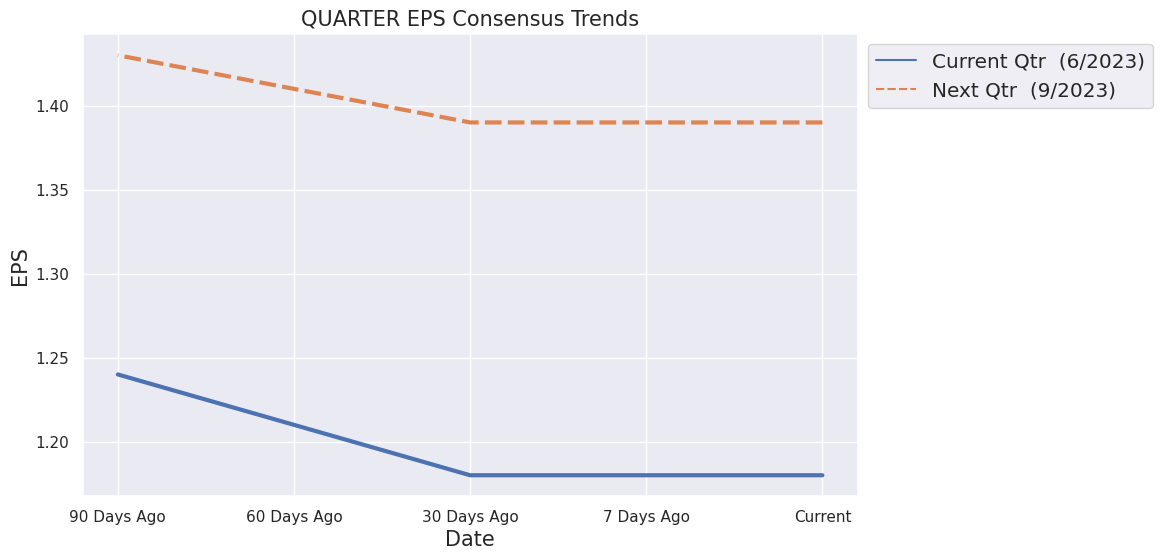

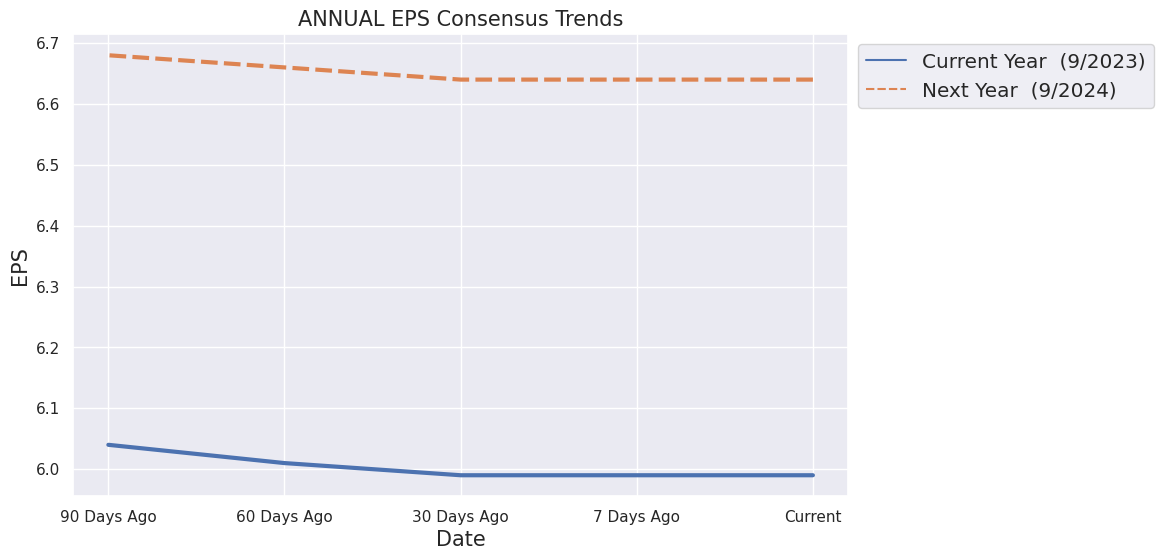




Analyst EPS Consensus Trends


,Current Qtr (6/2023),Next Qtr (9/2023),Current Year (9/2023),Next Year (9/2024)
Period,,,,
Current,1.18,1.39,5.99,6.64
7 Days Ago,1.18,1.39,5.99,6.64
30 Days Ago,1.18,1.39,5.99,6.64
60 Days Ago,1.21,1.41,6.01,6.66
90 Days Ago,1.24,1.43,6.04,6.68


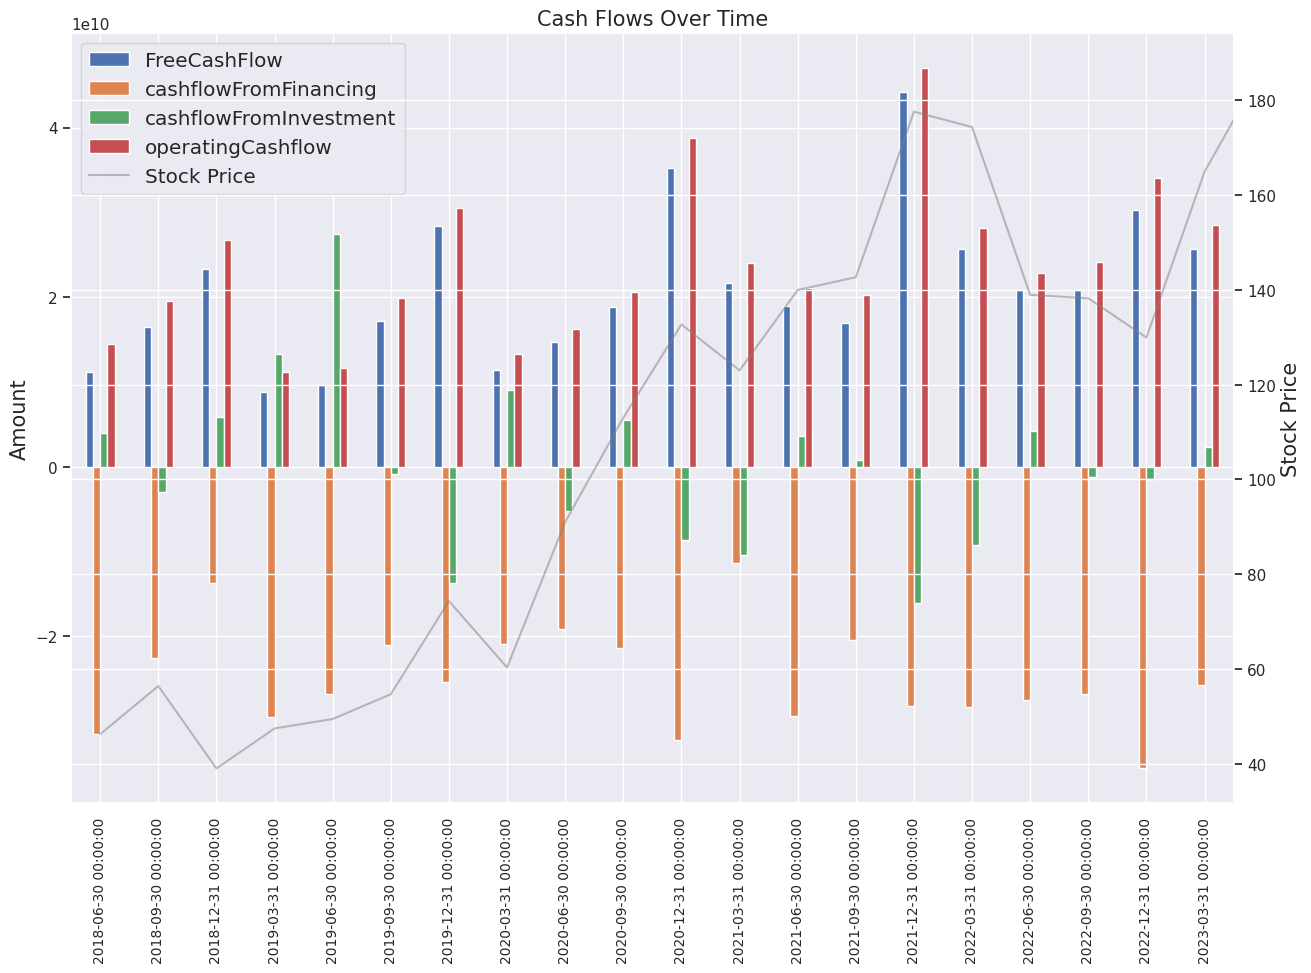

In [ ]:
#@title Run Code
calls.estimates(consensus, 'quarter')
calls.estimates(consensus, 'annual')
text = ('\n\n\nAnalyst EPS Consensus Trends')
formatted_text = "\033[1;4m{}\033[0m".format(text)
print(f"{formatted_text}")
display(consensus)

calls.cash_flows()

# Cash Flow From Invesment

Cash flow from investments refers to the amount of cash inflow or outflow generated from a company's investments in assets, such as property, equipment, securities, or other investments. Here are some examples of cash flow from investment:

Purchase of property: When a company purchases a property, the cash outflow from the investment will be recorded as a negative cash flow from investment.

Sale of property: When a company sells a property, the cash inflow from the sale will be recorded as a positive cash flow from investment.

Purchase of equipment: When a company purchases new equipment, the cash outflow from the investment will be recorded as a negative cash flow from investment.

Sale of equipment: When a company sells equipment, the cash inflow from the sale will be recorded as a positive cash flow from investment.

Purchase of securities: When a company purchases securities, such as stocks or bonds, the cash outflow from the investment will be recorded as a negative cash flow from investment.

Sale of securities: When a company sells securities, the cash inflow from the sale will be recorded as a positive cash flow from investment.

Dividend income: When a company receives dividends from its investments, the cash inflow from the dividend income will be recorded as a positive cash flow from investment.

Interest income: When a company receives interest on its investments, the cash inflow from the interest income will be recorded as a positive cash flow from investment.

# Cash Flow From Financing

Cash flow from financing refers to the inflow and outflow of cash resulting from a company's financing activities, such as borrowing money, issuing stock, or paying dividends to shareholders. These activities affect the company's capital structure and the overall amount of debt and equity that the company holds.

Here are some examples of cash flow from financing:

Issuing new stock: When a company issues new shares of stock, the cash inflow from the sale of those shares is recorded as a positive cash flow from financing.

Repurchasing stock: When a company buys back its own stock, the cash outflow from the repurchase is recorded as a negative cash flow from financing.

Issuing debt: When a company borrows money through issuing bonds or taking out loans, the cash inflow from the debt issuance is recorded as a positive cash flow from financing.

Repaying debt: When a company pays off its debt, the cash outflow from the repayment is recorded as a negative cash flow from financing.

Paying dividends: When a company pays dividends to its shareholders, the cash outflow from the payment is recorded as a negative cash flow from financing.

The net result of cash flow from financing activities can indicate whether a company is funding its operations through debt or equity, and whether it is generating enough cash to pay its obligations or requires additional financing to continue operating. Investors and analysts use this information to evaluate a company's financial health and investment potential.





# Cash Flow From Operations


Cash flow from operations represents the cash generated or consumed by a company's core business activities. It includes cash inflows and outflows directly related to day-to-day operations. Here are some examples:

Cash inflows from operations:

Cash received from customer payments for products or services.
Cash received from the collection of accounts receivable.
Cash received from the sale of inventory.
Cash received from interest or dividends earned on investments.
Cash outflows from operations:

Cash payments to suppliers for raw materials or inventory.
Cash payments to employees as wages or salaries.
Cash payments for operating expenses such as rent, utilities, and insurance.
Cash payments for taxes, both income taxes and sales taxes.
Cash payments for interest on loans or credit lines.